<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means bad cases

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [3]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [4]:
## Convert data into a DataFrame

# Declare the column names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [5]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean    -0.001963    0.001739
std      0.521477    0.525860
min     -1.056629   -1.060360
25%     -0.302555   -0.279561
50%      0.003457   -0.011386
75%      0.281797    0.290627
max      1.046728    1.084680

Sample of X__________________________________________________
          A         B
0 -0.154323 -0.963487
1  0.265464  0.291678
2 -0.486665 -0.951817
3 -0.240577  0.018987
4 -0.289584  0.136708


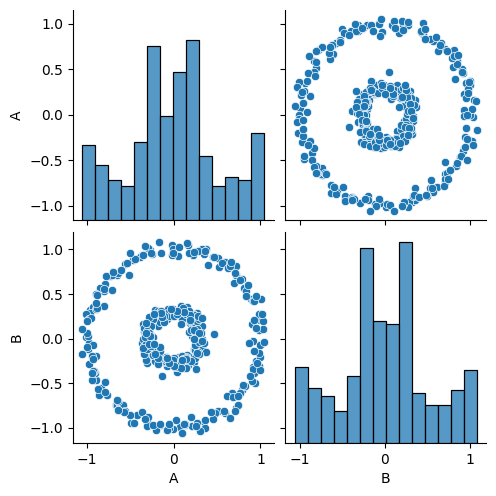

In [6]:
sbn.pairplot(X)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types
- Availability
- Dispersion and Distribution

### Question: Which features could/should be used to cluster the data points?

In [7]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)

    return centroids

In [8]:
centroids = create_centroids(4,["A", "B"])
print(centroids)

[[0.3395904926137263, 0.44361191490902074], [-0.5091331310599497, -0.3164184389775865], [0.005567240284453989, 0.6082044005611178], [0.5704440088487142, -0.15343842894852433]]


In [9]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt(np.square(p - q).sum())
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [10]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])

    return c

In [11]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

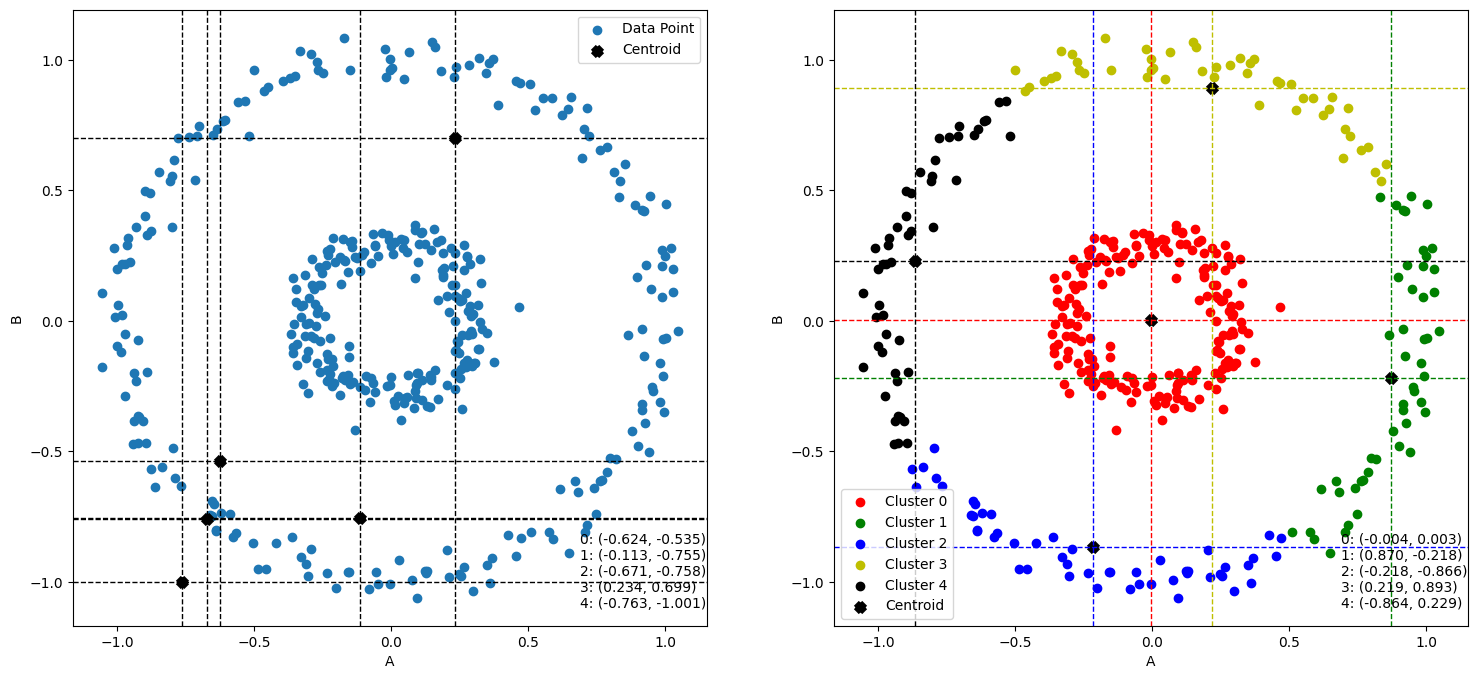

In [12]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 5 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

assignment_changes = [] # To track 
while True: 
    # 3. Calculate the distance between each data point and cluster centers 
    # 4. Assign the data point to the cluster whose distance from its center is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis=1).values # If this is not the first iteration, calculate the number of assignment changes 
if previous_assignments is not None: changes = np.sum(previous_assignments != y) 
    assignment_changes.append(changes) print(f"Iteration {len(assignment_changes)}: {changes} points changed clusters.") # Store the current assignments for the next iteration's comparison
previous_assignments = y.copy() # Move the known assignment to the previous state for post comparison old_c = centroids.copy() # 5. Recalculate all new cluster centers by averaging the objects of each cluster 
centroids = update_centroid(X[features], y, centroids) centroids_list.append(centroids) # 6. Repeat steps 3 to 5 until the centroids do not change or until no assignments change if 
np.array_equal(old_c, centroids): 
break

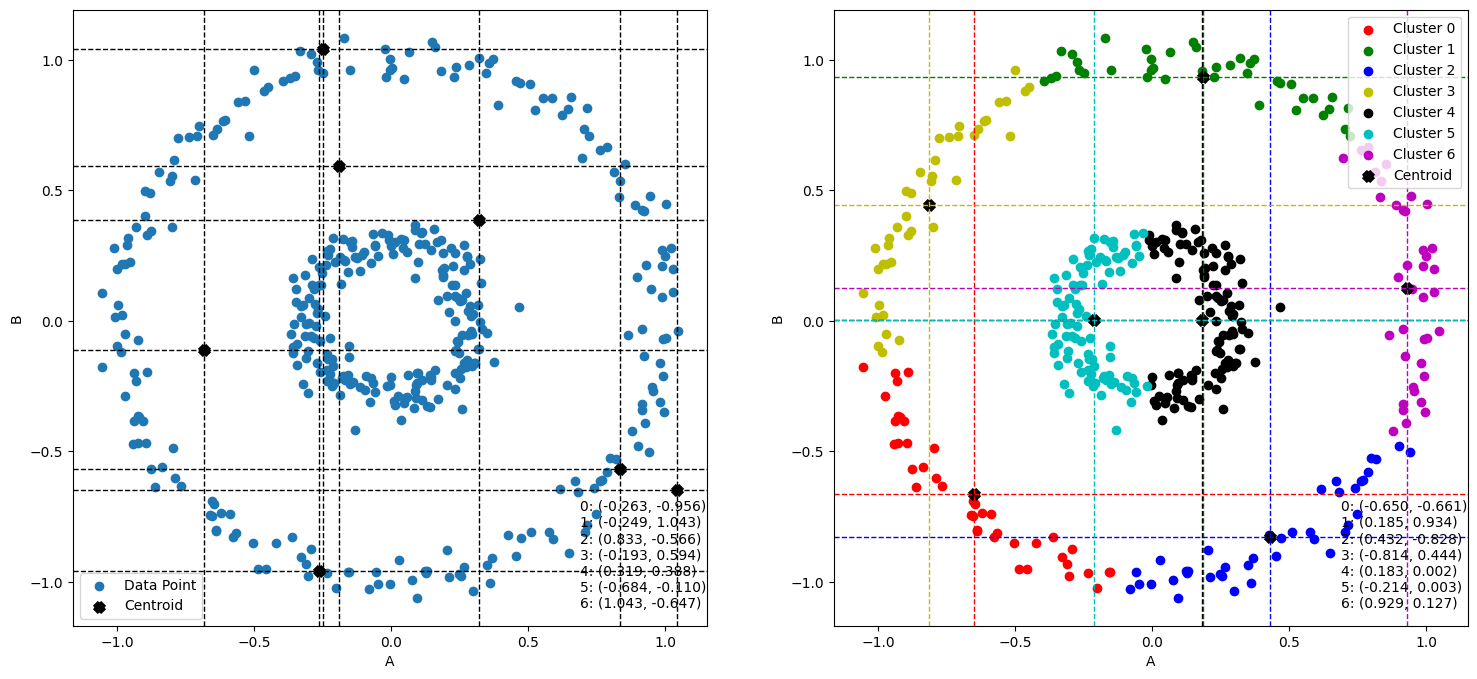

In [13]:
## K is changed
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 7 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features) 


# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

Iteration 1: 68 points changed clusters.
Iteration 2: 31 points changed clusters.
Iteration 3: 15 points changed clusters.
Iteration 4: 9 points changed clusters.
Iteration 5: 6 points changed clusters.
Iteration 6: 5 points changed clusters.
Iteration 7: 1 points changed clusters.
Iteration 8: 0 points changed clusters.


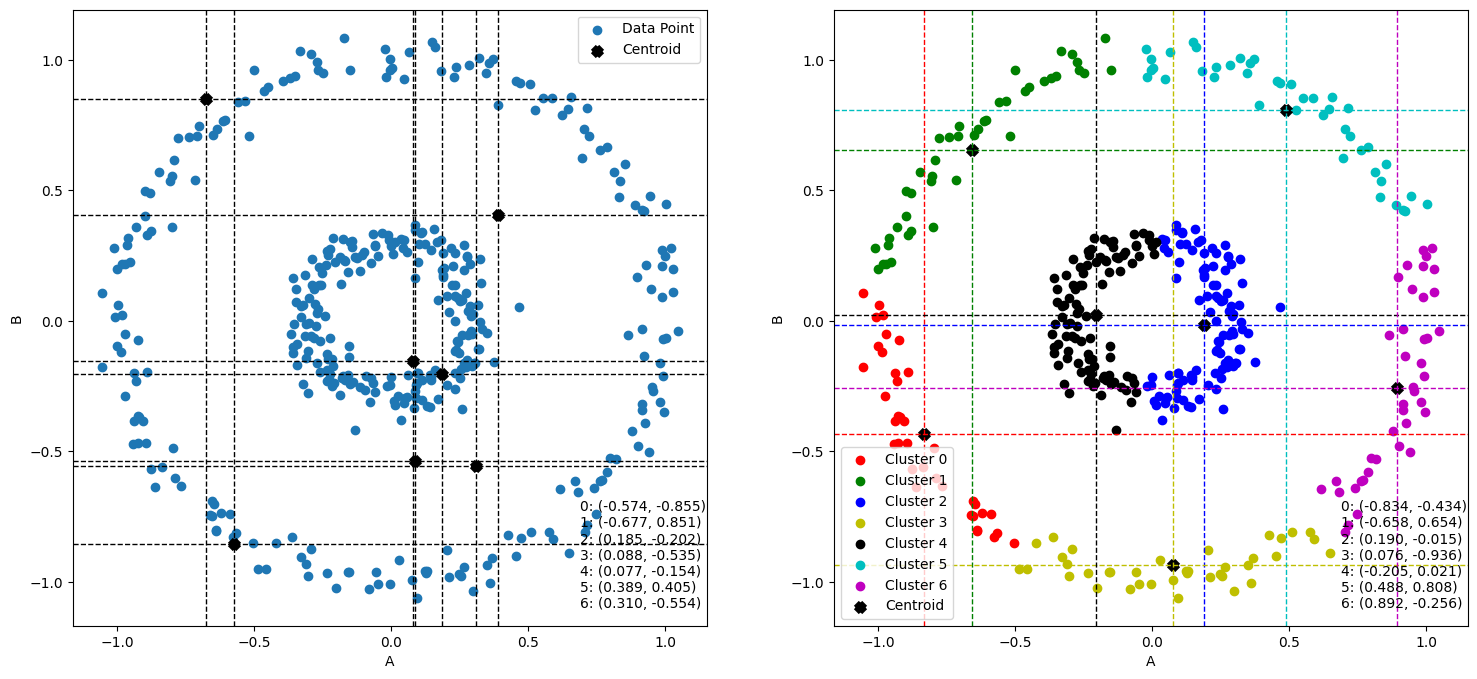

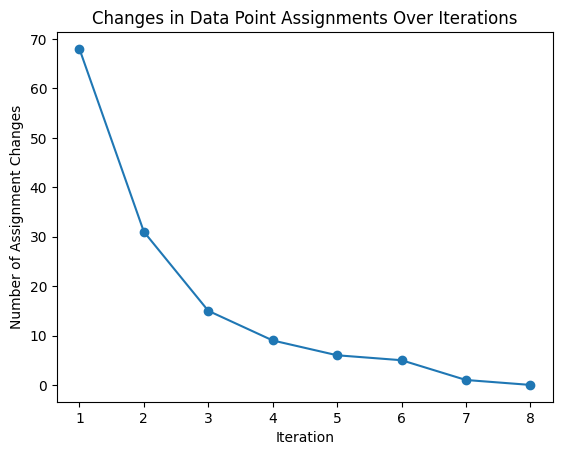

In [14]:
# 1. Define the number of clusters `K`
K = 7 # choose different values for `K`
# list the features to be used
features = ['A', 'B']
# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]
# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)
# repeat util makes no moves
assignment_changes = []  # To track the number of changes in assignment
previous_assignments = None  # To hold the assignments from the previous iteration
# Repeat until no data points change their cluster assignment
while True:
    # 3. Calculate the distance between each data point and cluster centers
    # 4. Assign the data point to the cluster whose distance from its center is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis=1).values
    # If this is not the first iteration, calculate the number of assignment changes
    if previous_assignments is not None:
        changes = np.sum(previous_assignments != y)
        assignment_changes.append(changes)
        print(f"Iteration {len(assignment_changes)}: {changes} points changed clusters.")
    # Store the current assignments for the next iteration's comparison
    previous_assignments = y.copy()
    # Move the known assignment to the previous state for post comparison
    old_c = centroids.copy()
    # 5. Recalculate all new cluster centers by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)
    # 6. Repeat steps 3 to 5 until the centroids do not change or until no assignments change
    if np.array_equal(old_c, centroids):
        break
# Plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()
# Plot the number of changes in assignment over iterations
plt.plot(range(1, len(assignment_changes) + 1), assignment_changes, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Number of Assignment Changes')
plt.title('Changes in Data Point Assignments Over Iterations')
plt.show()

In [46]:
#Extra Question 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [47]:
# Generate a simple dataset
np.random.seed(42)
X = np.random.randn(100, 2)

In [48]:
# Introduce some outliers
outliers = np.array([[8, 8], [9, 9], [10, 10]])
X_with_outliers = np.vstack([X, outliers])

In [49]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [51]:
#Question:1
#Now do clustering on two clusters and visualize aganist the 2 features

In [58]:
# Apply K-Means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_with_outliers)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

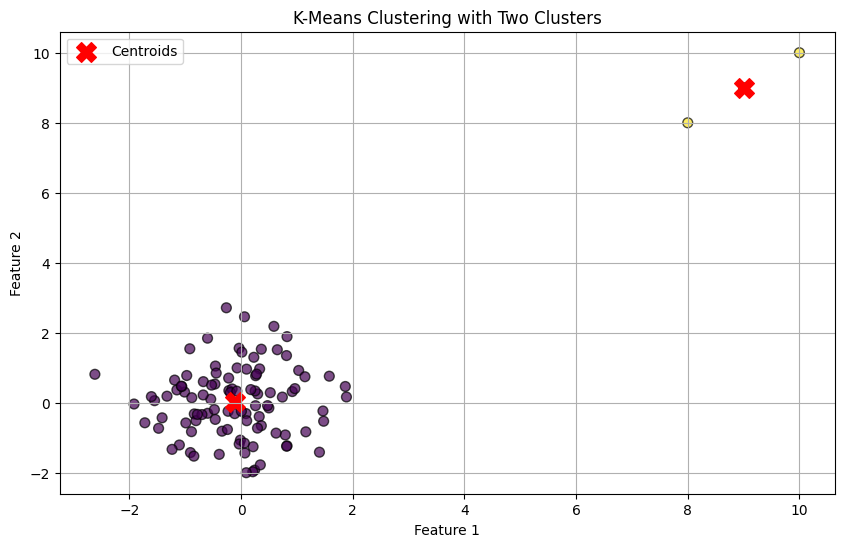

In [59]:
# Plot the clusters
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Two Clusters')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [54]:
#Question:2
#Explore the Effect of Scaling on K-Means Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [55]:
# Generate a dataset with features on different scales
np.random.seed(42)
X = np.array([[1, 20], [2, 21], [3, 22], [10, 1], [11, 2], [12, 3]])
#Apply K-Means without scaling & Plot without scaling
#Apply K-Means with scaling & Plot scaling

In [56]:
# Apply K-Means clustering without scaling
kmeans_no_scaling = KMeans(n_clusters=2, random_state=42)
kmeans_no_scaling.fit(X)
labels_no_scaling = kmeans_no_scaling.labels_
centers_no_scaling = kmeans_no_scaling.cluster_centers_


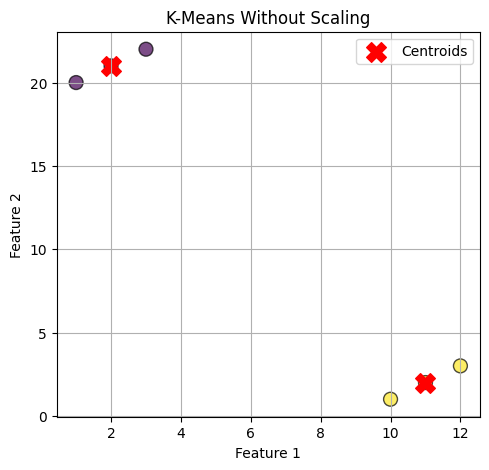

In [57]:

# Plot the clustering result without scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_no_scaling, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.scatter(centers_no_scaling[:, 0], centers_no_scaling[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Without Scaling')
plt.legend()
plt.grid(True)

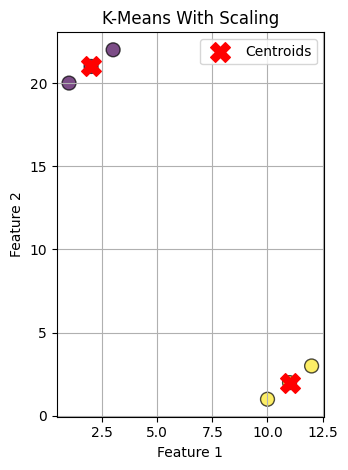

In [42]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with scaling
kmeans_with_scaling = KMeans(n_clusters=2, random_state=42)
kmeans_with_scaling.fit(X_scaled)
labels_with_scaling = kmeans_with_scaling.labels_
centers_with_scaling = kmeans_with_scaling.cluster_centers_

# Rescale the cluster centers to the original feature space for plotting
centers_with_scaling_rescaled = scaler.inverse_transform(centers_with_scaling)

# Plot the clustering result with scaling
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_with_scaling, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.7)
plt.scatter(centers_with_scaling_rescaled[:, 0], centers_with_scaling_rescaled[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means With Scaling')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


In [61]:
#Question:3
#Identify the Optimal Number of Clusters Using the Elbow Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [62]:
# Generate a dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
#Question 3
#Use the Elbow Method to find the optimal number of clusters

In [63]:
# Define a range of cluster numbers to test
cluster_range = range(1, 11)  # From 1 to 10 clusters
ssd = []  # Sum of Squared Distances (SSD)

# Compute K-Means clustering and SSD for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)  # Inertia is the SSD

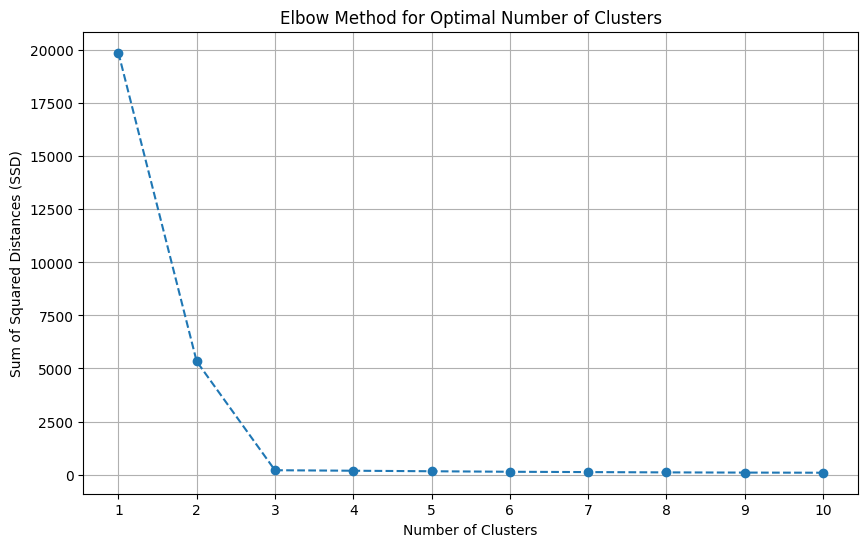

In [64]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, ssd, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [66]:
# Generate a dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

In [67]:
# Apply K-Means with random initialization
kmeans_random = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans_random.fit(X)
labels_random = kmeans_random.labels_
centers_random = kmeans_random.cluster_centers_

In [68]:
# Apply K-Means with k-means++ initialization
kmeans_plus_plus = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_plus_plus.fit(X)
labels_plus_plus = kmeans_plus_plus.labels_
centers_plus_plus = kmeans_plus_plus.cluster_centers_

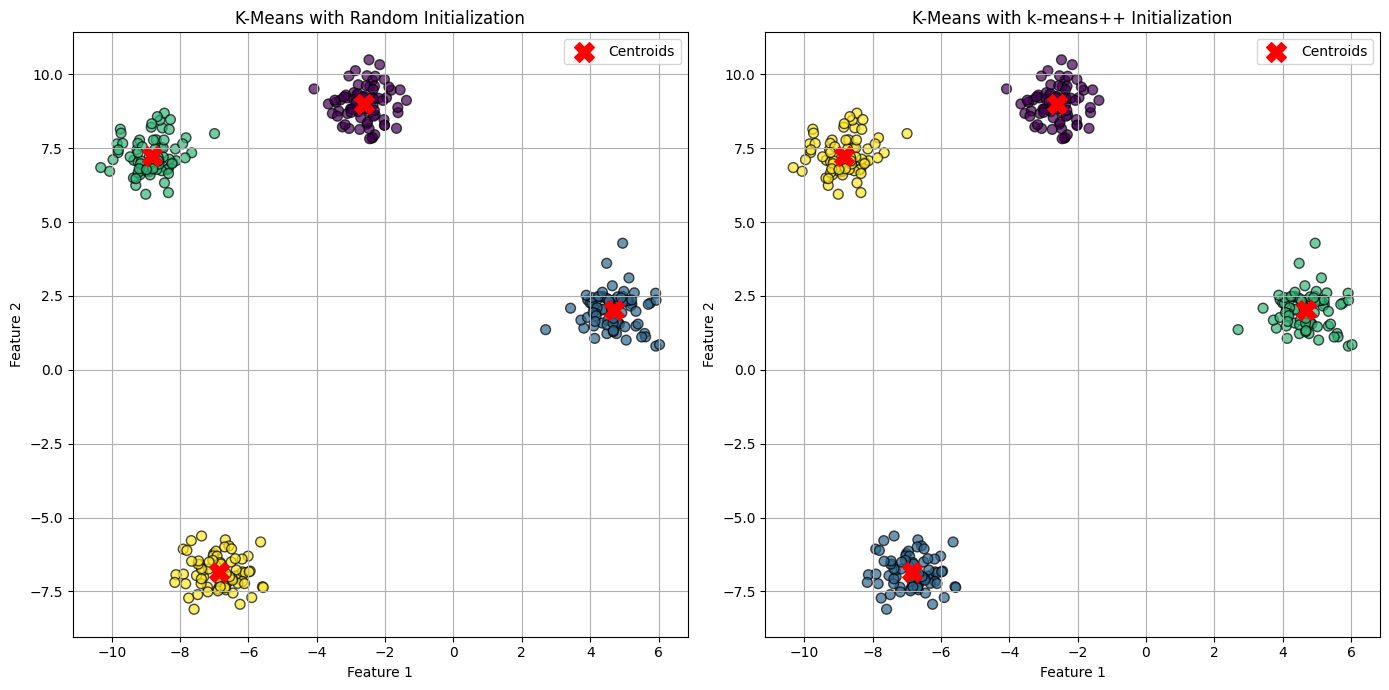

In [69]:
# Create a figure with subplots
plt.figure(figsize=(14, 7))

# Plot for random initialization
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_random, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.scatter(centers_random[:, 0], centers_random[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means with Random Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Plot for k-means++ initialization
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_plus_plus, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.scatter(centers_plus_plus[:, 0], centers_plus_plus[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means with k-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


>

>

>



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



